In [12]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iet-dataset/submission_template.csv
/kaggle/input/iet-dataset/test_data_no_target.csv
/kaggle/input/iet-dataset/train_data.csv
/kaggle/input/iet-dataset/images_train/119_kitchen.jpg
/kaggle/input/iet-dataset/images_train/52_kitchen.jpg
/kaggle/input/iet-dataset/images_train/213_frontal.jpg
/kaggle/input/iet-dataset/images_train/461_bedroom.jpg
/kaggle/input/iet-dataset/images_train/278_frontal.jpg
/kaggle/input/iet-dataset/images_train/120_bedroom.jpg
/kaggle/input/iet-dataset/images_train/75_frontal.jpg
/kaggle/input/iet-dataset/images_train/241_bathroom.jpg
/kaggle/input/iet-dataset/images_train/61_kitchen.jpg
/kaggle/input/iet-dataset/images_train/59_frontal.jpg
/kaggle/input/iet-dataset/images_train/181_bathroom.jpg
/kaggle/input/iet-dataset/images_train/403_frontal.jpg
/kaggle/input/iet-dataset/images_train/473_bathroom.jpg
/kaggle/input/iet-dataset/images_train/428_bathroom.jpg
/kaggle/input/iet-dataset/images_train/450_kitchen.jpg
/kaggle/input/iet-dataset/images_t

In [63]:
df_houses = pd.read_csv('/kaggle/input/iet-dataset/train_data.csv')
#df_perth0.columns = map(str.lower, df_perth0.columns)
#df_perth0 = df_perth0.drop(['longitude','latitude'],axis=1)
#df_perth0.rename({'cbd_dist':'CBD_dist'},axis=1,inplace=True)
#df_perth0.columns

In [11]:
display(df_houses)

,ID,Bedrooms,Bathrooms,Area,ZipCode,Price
0,285,5,5.0,3816,92880,589900
1,348,2,2.0,1440,92276,106000
2,441,4,3.0,1625,93510,639000
3,422,4,3.0,2454,93510,5858000
4,150,4,4.5,4038,92677,1795000
...,...,...,...,...,...,...
423,72,3,2.0,2288,62214,196000
424,107,3,2.0,1826,93446,529000
425,271,3,1.5,1400,95008,999000
426,436,3,2.0,2095,93510,479000


In [15]:
y = np.array(df_houses['Price']).reshape(-1, 1)

In [18]:
df_houses = df_houses.drop('ID', axis=1)
df_houses = df_houses.drop('Price', axis=1)
display(df_houses)


,Bedrooms,Bathrooms,Area,ZipCode
0,5,5.0,3816,92880
1,2,2.0,1440,92276
2,4,3.0,1625,93510
3,4,3.0,2454,93510
4,4,4.5,4038,92677
...,...,...,...,...
423,3,2.0,2288,62214
424,3,2.0,1826,93446
425,3,1.5,1400,95008
426,3,2.0,2095,93510


In [168]:
import numpy as np

import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

from sklearn import preprocessing, svm

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [49]:
X = df_houses.to_numpy()

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [46]:
regr = LinearRegression()

In [47]:
regr.fit(X_train, y_train)

LinearRegression()

# Regression Predictor

In [44]:
y_pred = regr.predict(X_test)

y_pred

array([[ 730207.03837653],
       [ 425250.40082069],
       [ 987412.68595137],
       [ 444923.94388362],
       [ 408688.53562049],
       [ 379345.46700718],
       [ 534968.94763922],
       [ 835047.52185693],
       [ 378442.02764764],
       [1003084.68959577],
       [ 583903.3083297 ],
       [ 231872.82106223],
       [ 787447.57471072],
       [ 374376.05764503],
       [ 596765.17582553],
       [ 373740.24425473],
       [ 738778.33930178],
       [1541037.1118849 ],
       [ 493724.3153303 ],
       [ 474577.32421015],
       [ 497859.42517273],
       [ 698661.87062511],
       [ 707709.99836089],
       [ 398235.73414682],
       [ 398369.56940611],
       [ 388603.60491915],
       [ 953278.31570759],
       [1093917.83112145],
       [ 446250.56013451],
       [1039772.2773919 ],
       [ 498247.74261692],
       [ 870177.51175137],
       [ 328245.85799933],
       [1169353.43327944],
       [ 609170.30971444],
       [ 632268.15399993],
       [ 811493.29748536],
 

This is some sort of measure of how well it is doing

In [43]:
print(regr.score(X_test, y_test))

0.4619138002974681


In [53]:
# Feature extraction from images

In [55]:
import torch
from torchvision.models import resnet50
from torchvision.models.feature_extraction import get_graph_node_names
from torchvision.models.feature_extraction import create_feature_extractor
from torchvision.models.detection.mask_rcnn import MaskRCNN
from torchvision.models.detection.backbone_utils import LastLevelMaxPool
from torchvision.ops.feature_pyramid_network import FeaturePyramidNetwork



In [57]:
resnet50 = resnet50(pretrained=True)
resnet50.eval()

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 170MB/s]


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

# Create dataloader


The idea is to create a dataloader that turns the images into tensors, gets the price from the train data then puts them into the model

In [ ]:
training_data

In [66]:
df_houses.sort_values('ID')

,ID,Bedrooms,Bathrooms,Area,ZipCode,Price
349,2,4,3.0,3343,36372,865200
79,4,5,5.0,4022,85262,910000
277,5,3,4.0,4116,85266,971226
71,6,4,5.0,4581,85266,1249000
90,8,4,5.0,5524,85266,1698000
...,...,...,...,...,...,...
172,528,4,3.5,3420,94531,550000
377,530,4,2.5,2236,94531,495000
8,532,4,3.5,9536,94531,460000
391,533,3,2.0,2014,94531,407000


In [79]:
val =df_houses.loc[(df_houses.ID == 193)].iat[0, 5]
print(val)

949000


Get all the images with corresponding ids.

In [129]:
houses = [None]*600

for dirname, _, filenames in os.walk('/kaggle/input/iet-dataset/images_train'):
    for filename in filenames:
        parts = filename.split("_")
        price = df_houses.loc[(df_houses.ID == int(parts[0]))].iat[0, 5]
        i = int(parts[0])
        if houses[i]!= None:
            houses[i][0].append(os.path.join('/kaggle/input/iet-dataset/images_train', filename))
        else:
            houses[i]=[[os.path.join('/kaggle/input/iet-dataset/images_train', filename)],price]
        

In [165]:
from PIL import Image
import torchvision

In [131]:
houses=[x for x in houses if x is not None]


In [ ]:
224x224
get models to 224x224

In [155]:
#todo resize images
def get_concat_h(im1, im2):
    dst = Image.new('RGB', (224,224))
    im1 = im1.resize((224//2, 224))
    im2 = im2.resize((224//2, 224))
    dst.paste(im1, (0, 0))
    dst.paste(im2, (im1.width, 0))
    return dst

def get_concat_v(im1, im2):
    dst = Image.new('RGB', (224,224))
    im1 = im1.resize((224, 224//2))
    im2 = im2.resize((224, 224//2))
    dst.paste(im1, (0, 0))
    dst.paste(im2, (0, im1.height))
    return dst

In [156]:
image_files=[]
for house in houses:
    images = house[0]
    im1 = Image.open(images[0])
    im2 = Image.open(images[1])
    im3 = Image.open(images[2])
    im4 = Image.open(images[3])
    
    joined1=get_concat_h(im1, im2)
    joined2=get_concat_h(im3, im4)
    joined=get_concat_v(joined1, joined2)
    image_files.append([joined,house[1]])

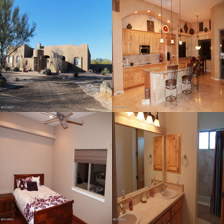

In [162]:
display(image_files[9][0])

In [ ]:
#create dataload

In [114]:
IMAGE_SIZE = joined.size

In [ ]:
input 

In [170]:
resnet = ResNet50(input_shape=224 + [3], weights='imagenet', include_top=False)

TypeError: unsupported operand type(s) for +: 'int' and 'list'